# Tests on Synthetic Datasets

In [1]:
import numpy as np
import sys

In [2]:
sys.path.insert(1, '/Users/frederiekelohmann/Documents/FS2024/DSL/DSL_Quake_Fault_Reconstruction/benchmark/src')

In [3]:
from plotting import *
from main import run_fault_reconstruction

In [4]:
# load the synthetic dataset
X = np.loadtxt('../data/synthetic_10.npy')
y = np.loadtxt('../data/synthetic_labs_10.npy')

In [5]:
kers_og, labs_og = run_fault_reconstruction(X, min_sz_cluster=4, align_t=0)

Processing chunk 1/1 with 1200 points
  Fit 178 Gaussian and 1 background kernels
  BIC: 6610.993199611205
Running in parallel
  146/15931 pairs have touching bbox
  Removed 0/146 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 15785.0
  Merged 30 pairs  >> 149 kernels left
  BIC: 5694.982050063253
Running in parallel
  201/4049 pairs have touching bbox
  Removed 0/201 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 10825.0
  Merged 16 pairs  >> 133 kernels left
  BIC: 5212.573024295212
Running in parallel
  211/2082 pairs have touching bbox
  Removed 0/211 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 8567.0
  Merged 13 pairs  >> 120 kernels left
  BIC: 4826.697498479412
Running in parallel
  209/1570 pairs have touching bbox
  Removed 0/209 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 6

In [9]:
kers_plan, labs_plan = run_fault_reconstruction(X, min_sz_cluster=4, align_t=0.6)

Processing chunk 1/1 with 1200 points
  Fit 178 Gaussian and 1 background kernels
  BIC: 6610.993199611205
  Running in parallel
  146/15931 pairs have touching bbox
  Removed 0/146 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 15785.0
  Merged 30 pairs  >> 149 kernels left
  BIC: 5694.982050063253
  Running in parallel
  201/4049 pairs have touching bbox
  Removed 0/201 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 10825.0
  Merged 16 pairs  >> 133 kernels left
  BIC: 5212.573024295212
  Running in parallel
  211/2082 pairs have touching bbox
  Removed 0/211 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative check: 8567.0
  Merged 13 pairs  >> 120 kernels left
  BIC: 4826.697498479412
  Running in parallel
  209/1570 pairs have touching bbox
  Removed 0/209 candidate pairs with negative gain
Nans from negative check: 0
Number nans after negative 

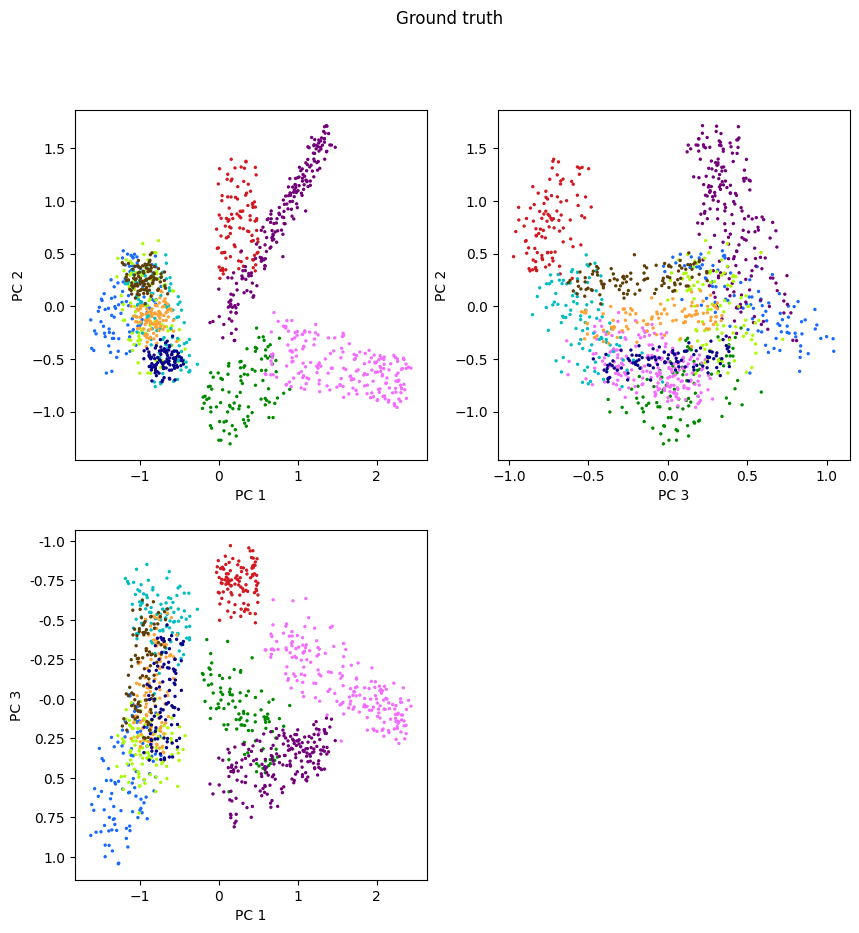

In [7]:
fig, ax = plot_components(X, y)
fig.suptitle('Ground truth')
plt.show()

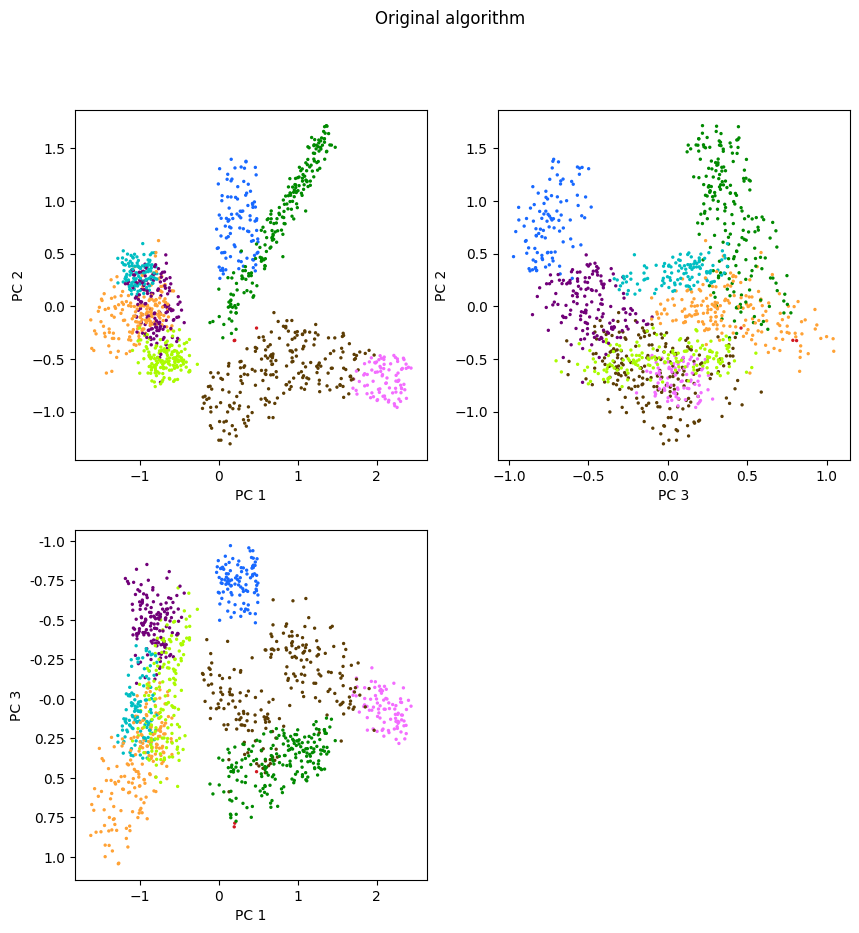

In [8]:
fig, ax = plot_components(X, labs_og)
fig.suptitle('Original algorithm')
plt.show()

* Clearly visible that the algorithm doesn't correctly separate the two brown planes
* Also doesn't find all clusters in the blob on the LHS of PC1

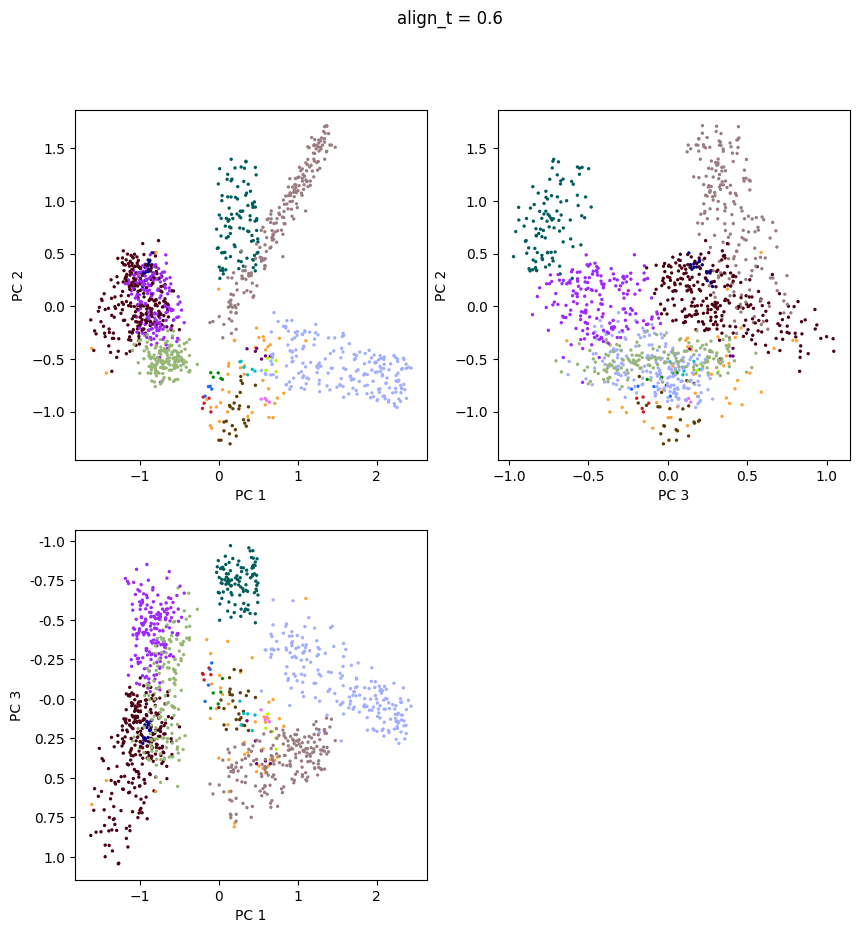

In [10]:
fig, ax = plot_components(X, labs_plan)
fig.suptitle('align_t = 0.6')
plt.show()

In [ ]:
from kernelparameters import KernelParameters

def filter_noise_pts(kernels: KernelParameters,
                     labels: np.ndarray):
    '''
    Creates a mask to filter all background points according to the given kernel configuration
    '''
    
    # retrieve the index of the background kernel
    noise_idx = np.arange(kernels.get_n_kernels())[kernels.get('ib')]

    return labels != noise_idx